In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

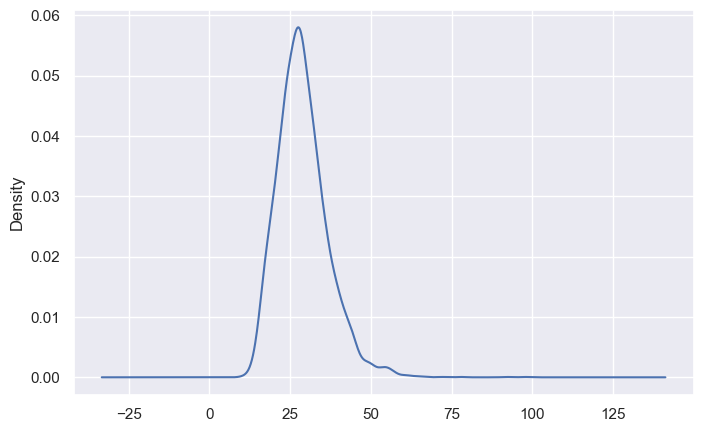

In [6]:
# Checking the distribution of the missing data column.

plt.figure(figsize=(8,5))
data['bmi'].plot(kind='kde')
plt.show()

Checking the distribution of the missing data column i.e bmi.

# Missing value Solution

In [7]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [8]:
# re-checking missing value

data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Droping unnecessary columns

In [9]:
data.drop(['id'], axis = 1, inplace=True)

In [10]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# EDA

## Target variable (Stroke)

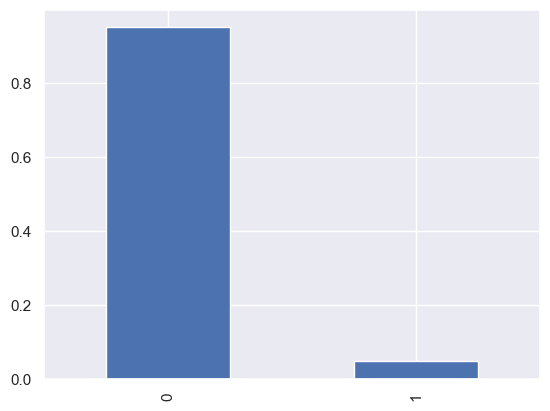

In [11]:
data['stroke'].value_counts(normalize=True).plot(kind='bar')
plt.show()

## Checking outliers in our dataset (Categorical columns)

In [12]:
num=data.select_dtypes(exclude='object')

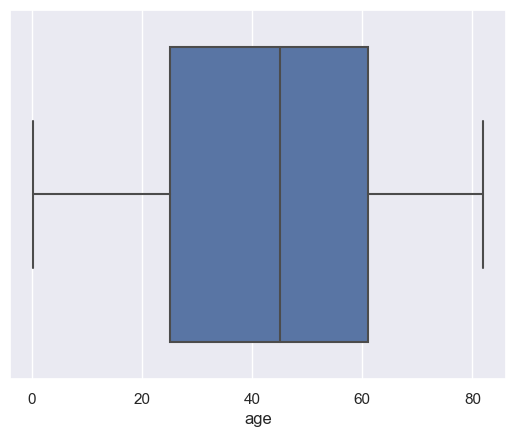

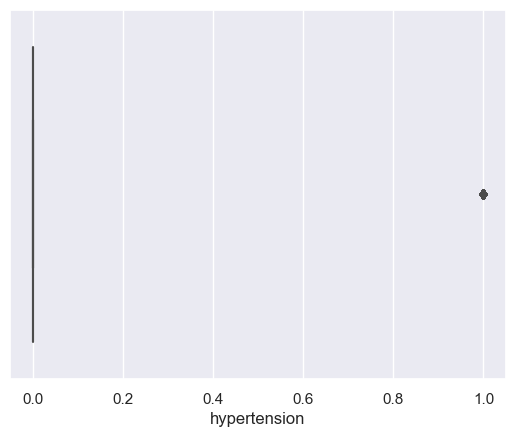

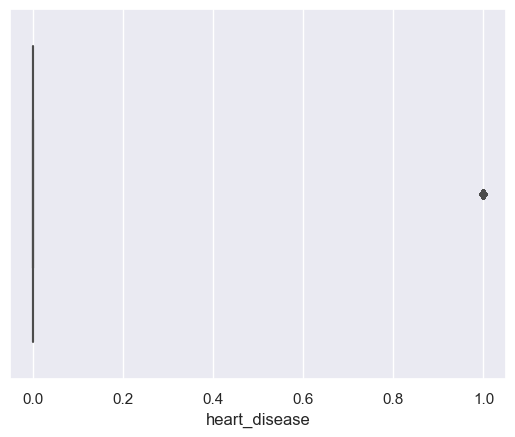

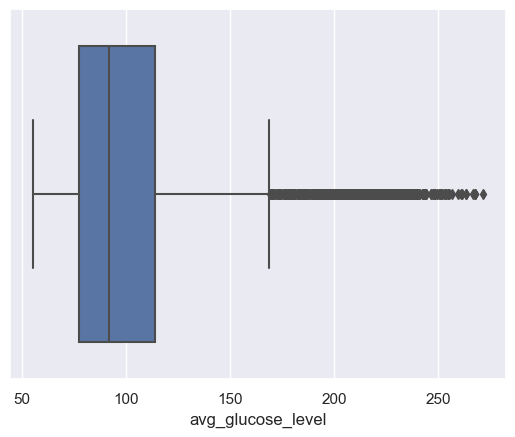

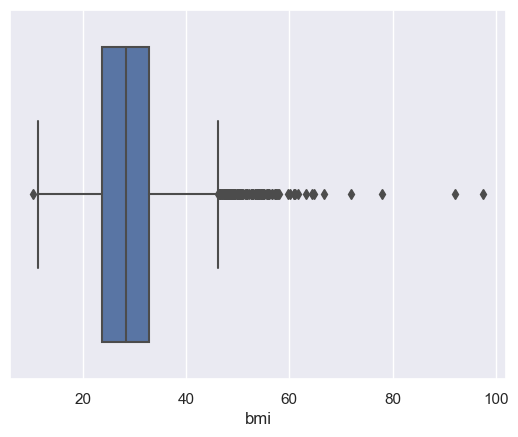

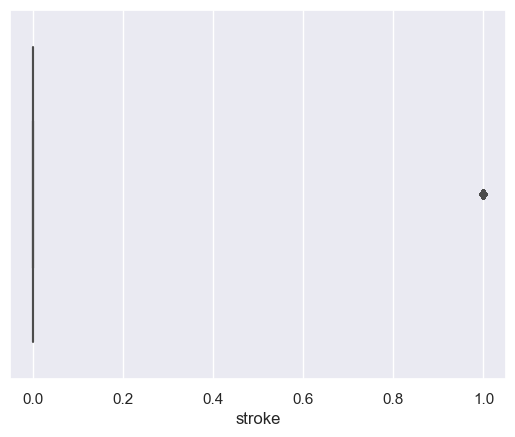

In [13]:
for i in num.columns:
    sns.boxplot(data=num,x=i)
    plt.show()

In [14]:
data.shape

(5110, 11)

In [15]:
import scipy.stats as stats
z = np.abs(stats.zscore(data.drop(columns='stroke').select_dtypes(exclude='object')))
data= data[(z<3).all(axis = 1)] 
data.shape

(4326, 11)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4326 entries, 1 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4326 non-null   object 
 1   age                4326 non-null   float64
 2   hypertension       4326 non-null   int64  
 3   heart_disease      4326 non-null   int64  
 4   ever_married       4326 non-null   object 
 5   work_type          4326 non-null   object 
 6   Residence_type     4326 non-null   object 
 7   avg_glucose_level  4326 non-null   float64
 8   bmi                4326 non-null   float64
 9   smoking_status     4326 non-null   object 
 10  stroke             4326 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 405.6+ KB


## Gender

In [17]:
data['gender'].value_counts()

Female    2582
Male      1743
Other        1
Name: gender, dtype: int64

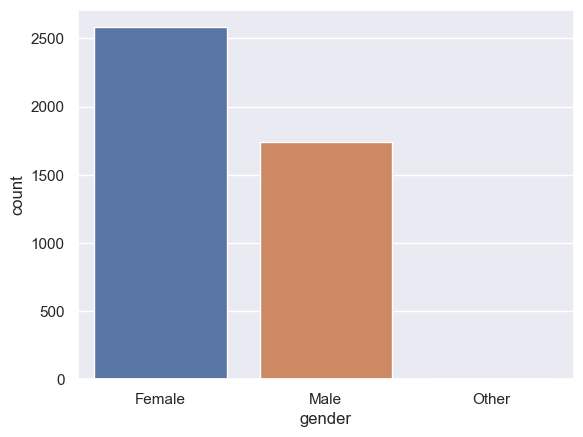

In [18]:
sns.countplot(data=data,x='gender')
plt.show()

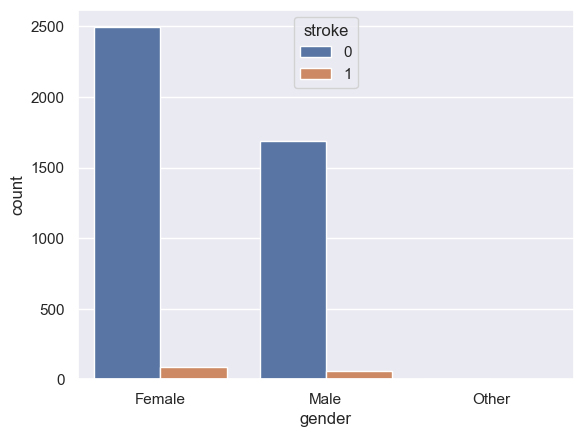

In [19]:
sns.countplot(data=data,x='gender',hue='stroke')
plt.show()

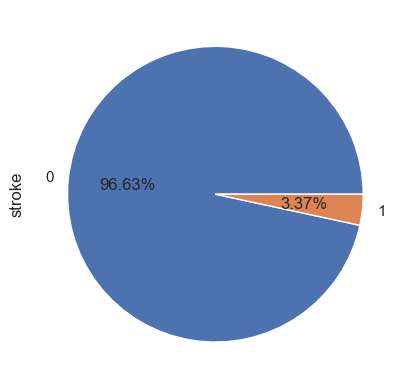

In [20]:
data['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

## Age

In [21]:
# More men than women had strokes
data.groupby('gender').mean()[['age', 'stroke']]

,age,stroke
gender,,
Female,40.691960,0.034082
Male,38.233138,0.033276
Other,26.000000,0.000000


More men than women had stroke attack.

## Ever married

In [22]:
data['ever_married'].value_counts()

Yes    2656
No     1670
Name: ever_married, dtype: int64

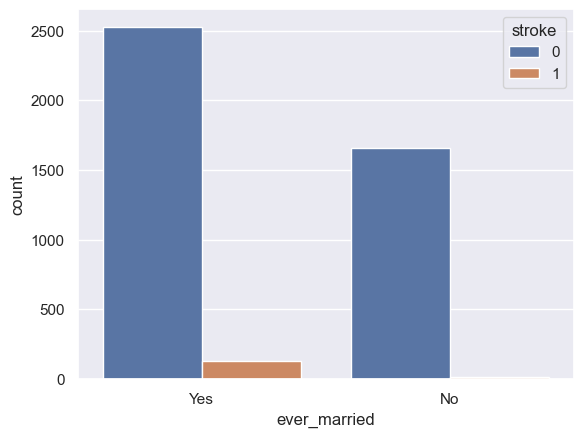

In [23]:
sns.countplot(data=data,x='ever_married',hue='stroke')
plt.show()

## Work Type

In [24]:
data['work_type'].unique()

array(['Self-employed', 'Private', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [25]:
data['work_type'].value_counts()

Private          2474
children          686
Self-employed     597
Govt_job          547
Never_worked       22
Name: work_type, dtype: int64

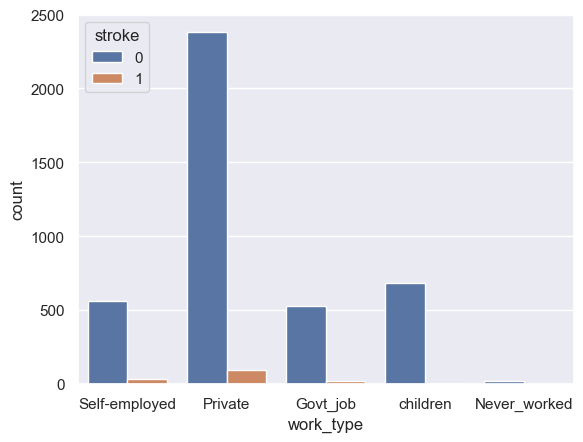

In [26]:
sns.countplot(data=data,x='work_type',hue='stroke')
plt.show()

## Residence Type

In [27]:
data['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [28]:
data['Residence_type'].value_counts()

Urban    2195
Rural    2131
Name: Residence_type, dtype: int64

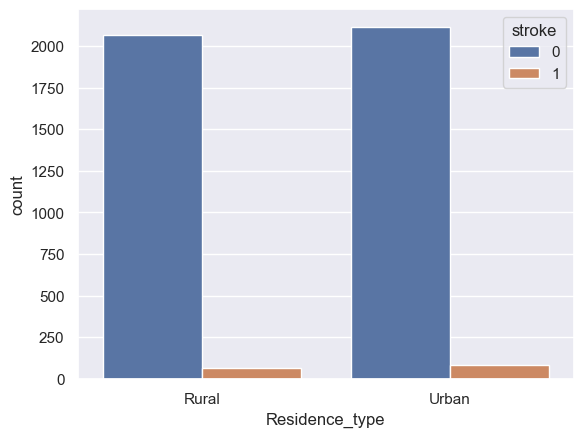

In [29]:
sns.countplot(data=data,x='Residence_type',hue='stroke')
plt.show()

## Smoking Features

In [30]:
data['smoking_status'].value_counts()

never smoked       1565
Unknown            1432
formerly smoked     696
smokes              633
Name: smoking_status, dtype: int64

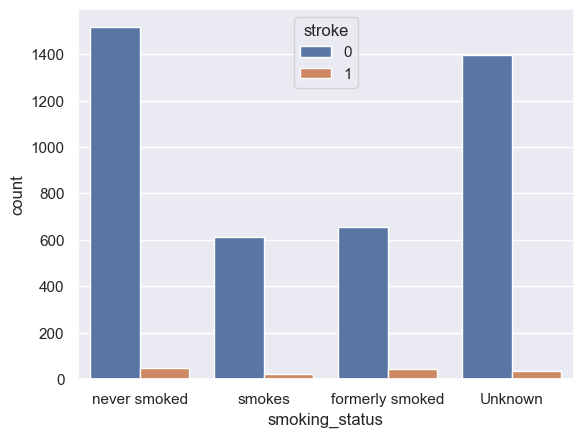

In [31]:
sns.countplot(data=data,x='smoking_status',hue='stroke')
plt.show()

# Heatmap

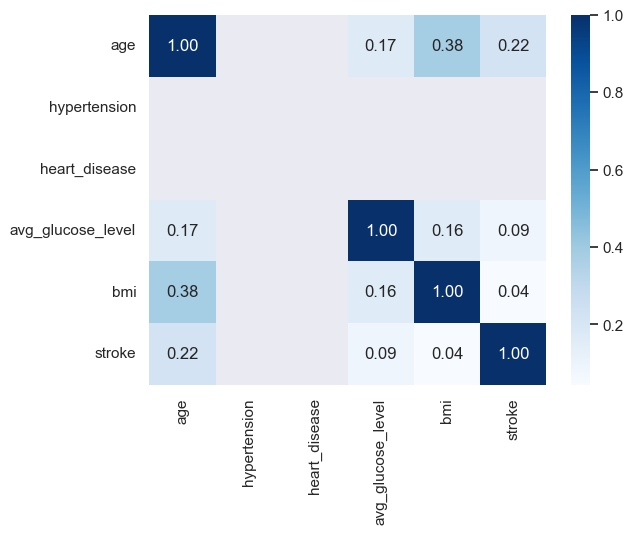

In [32]:
sns.heatmap(data.corr(),cmap='Blues',annot=True,fmt='.2f')
plt.show()

# Encoding the categorical variables

In [33]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [34]:
data['stroke'].value_counts()

0    4180
1     146
Name: stroke, dtype: int64

### Do Oversampling Minority Class to Balance the class label

In [35]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['stroke']==0)] 
df_minority = data[(data['stroke']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 n_samples= len(df_majority), 
                                 random_state=0)  
                                                  
# Combine majority class with upsampled minority class
df2 = pd.concat([df_minority_upsampled, df_majority])
df2.head()
df2.stroke.value_counts()

1    4180
0    4180
Name: stroke, dtype: int64

In [36]:
data=df2

In [37]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [38]:
data['gender'] = lr.fit_transform(data['gender'])
data['ever_married'] = lr.fit_transform(data['ever_married'])
data['work_type'] = lr.fit_transform(data['work_type'])
data['Residence_type'] = lr.fit_transform(data['Residence_type'])
data['smoking_status'] = lr.fit_transform(data['smoking_status'])

In [39]:
data.shape

(8360, 11)

# Split

In [40]:
X=data.drop('stroke',axis=1).values
X

array([[  1.        ,  74.        ,   0.        , ...,  98.55      ,
         25.6       ,   0.        ],
       [  1.        ,  78.        ,   0.        , ...,  90.19      ,
         26.9       ,   2.        ],
       [  0.        ,  72.        ,   0.        , ..., 219.91      ,
         28.89323691,   0.        ],
       ...,
       [  0.        ,  35.        ,   0.        , ...,  82.99      ,
         30.6       ,   2.        ],
       [  1.        ,  51.        ,   0.        , ..., 166.29      ,
         25.6       ,   1.        ],
       [  0.        ,  44.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [41]:
Y=data['stroke'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
# from imblearn.over_sampling import SMOTE


# # Create the SMOTE oversampler
# smote = SMOTE()

# # Oversample the minority class
# X_oversampled, y_oversampled = smote.fit_resample(X, Y)

# # Print the oversampled data
# print(X_oversampled)
# print(y_oversampled)
# X=X_oversampled
# Y=y_oversampled

## splitting

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
classifier = LogisticRegression()

In [46]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [47]:
predict = classifier.predict(X_test)
predict

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [48]:
Y_test

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

# Evaluation for Logistic Regression

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
print(confusion_matrix(Y_test, predict))

[[598 232]
 [159 683]]


In [51]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       830
           1       0.75      0.81      0.78       842

    accuracy                           0.77      1672
   macro avg       0.77      0.77      0.77      1672
weighted avg       0.77      0.77      0.77      1672



In [52]:
print('Accuracy score :',accuracy_score(Y_test, predict))

Accuracy score : 0.7661483253588517


# KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [56]:
pred = knn.predict(X_test)
pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
Y_test

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

# Evaluation for KNN Classifier

In [58]:
print('Accuracy:',accuracy_score(Y_test, pred))

Accuracy: 0.9354066985645934


# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
classifier = DecisionTreeClassifier(max_depth=3)

In [61]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [63]:
Y_test

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

# Evaluation for Decision Tree Classifier

In [64]:
print('Accuracy:',accuracy_score(Y_test, Y_pred))

Accuracy: 0.7805023923444976


## Ploting Tree with plot_tree

In [65]:
from sklearn import tree

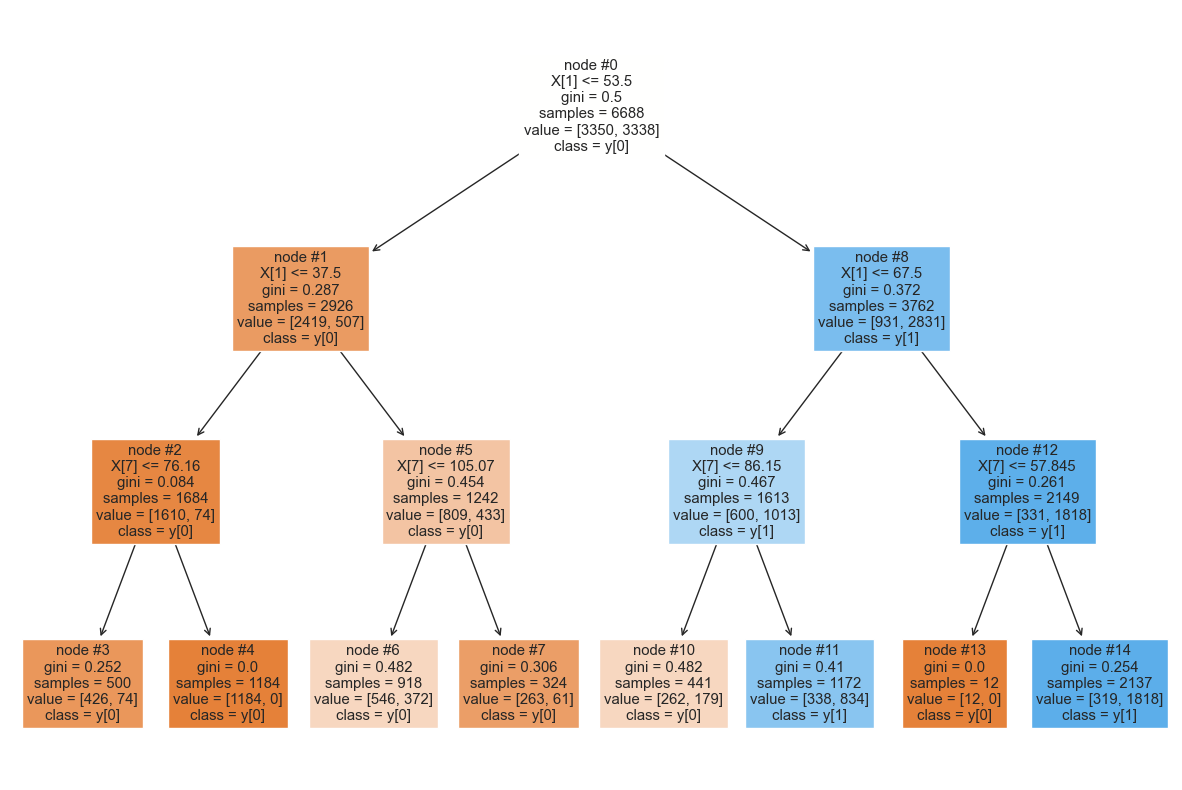

In [66]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,class_names=True,node_ids=True)
plt.show()

# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
classifier = RandomForestClassifier()

In [69]:
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [70]:
Y_pred1 = classifier.predict(X_test)
Y_pred1

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [71]:
Y_test

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

## Evaluation for Random Forest Classifier

In [72]:
print('Accuracy:', accuracy_score(Y_pred1, Y_test))

Accuracy: 0.9970095693779905


In [73]:
import pickle
pickle.dump(classifier, open('rand_classifier.pkl', 'wb'))

In [74]:
model_try = pickle.load(open('rand_classifier.pkl', 'rb'))

In [75]:
model_try.score(X_train, Y_train)

1.0